# **Exploratory Data Analysis**

### Import required packages

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
from wordcloud import WordCloud

### Load CSV

In [ ]:
tedtalks = pd.read_csv('/Ted-Talks-Recommender-System/Data_output/talks_2.csv').drop(columns='Unnamed: 0')

### Set full view for columns/rows

In [3]:
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Set display options to show full column width
pd.set_option('display.max_colwidth', None)

### Overview of TED Talks Data: Top Rows and DataFrame Info

In [9]:
tedtalks.head()

,author,talk,description,likes,views,transcript
0,Machine Dazzle,how to unleash your inner maximalist through c...,tapping into the transformational power of cos...,8100,270192,"Hello, I am Machine Dazzle, and I am an emotio..."
1,Fabio Pacucci,the battle that formed the universe,its time for the biggest battle in the univers...,51,Fabio,Welcome one and all! It’s time to grab your se...
2,Jioji Ravulo,a liberating vision of identity that transcend...,how can we move past societys inclination to b...,9200,309952,Can you paint with all the colors of the wind?...
3,Rebecca Darwent,how to fund real change in your community,is there a way to give back that benefits ever...,1000,341218,I spent my whole career in the nonprofit secto...
4,Susanne Buckley-Zistel,what caused the rwandan genocide,for one hundred days in 1994 the african count...,3700,126376,"For 100 days in 1994, the African country of R..."


In [10]:
display(tedtalks.info())
display(tedtalks.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       6000 non-null   object
 1   talk         5997 non-null   object
 2   description  5993 non-null   object
 3   likes        5996 non-null   object
 4   views        6001 non-null   object
 5   transcript   5302 non-null   object
dtypes: object(6)
memory usage: 281.4+ KB


None

,author,talk,description,likes,views,transcript
count,6000,5997,5993,5996,6001,5302
unique,4857,5965,5992,714,5975,5301
top,Alex Gendler,my wish,how do we make sense of a world that doesnt by...,3900,0,"The world is awash with divisive arguments, co..."
freq,47,14,2,100,8,2


### Duplicate Removal

In [11]:
tedtalks = tedtalks.drop_duplicates()
tedtalks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5997 entries, 0 to 6000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       5996 non-null   object
 1   talk         5994 non-null   object
 2   description  5993 non-null   object
 3   likes        5994 non-null   object
 4   views        5997 non-null   object
 5   transcript   5302 non-null   object
dtypes: object(6)
memory usage: 328.0+ KB


In [12]:
tedtalks = tedtalks.dropna()
tedtalks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5302 entries, 0 to 6000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       5302 non-null   object
 1   talk         5302 non-null   object
 2   description  5302 non-null   object
 3   likes        5302 non-null   object
 4   views        5302 non-null   object
 5   transcript   5302 non-null   object
dtypes: object(6)
memory usage: 290.0+ KB


In [13]:
tedtalks_author_talk = tedtalks[['author','talk']]
tedtalks_author_talk.duplicated(keep=False).sum()
tedtalks[tedtalks_author_talk.duplicated(keep=False)]

,author,talk,description,likes,views,transcript
2136,Eugenia Cheng,an unexpected tool for understanding inequality,how do we make sense of a world that doesnt by...,1800,613222,"The world is awash with divisive arguments, co..."
2543,Eugenia Cheng,an unexpected tool for understanding inequality,how do we make sense of a world that doesnt by...,1800,613234,"The world is awash with divisive arguments, co..."
4275,Jessica Oreck and Rachael Teel,mysteries of vernacular,in 1920 czech writer karel čapek wrote a play ...,3300,110587,"Mysteries of vernacular: Robot, a machine capa..."
4352,Jessica Oreck and Rachael Teel,mysteries of vernacular,dating back to the early roman empire the word...,1100,38628,"Mysteries of vernacular: Sarcophagus, a stone ..."
4382,Joy Lin,if superpowers were real,what if invisibility wasnt just the stuff of e...,4300,1452119,Wouldn&apos;t it be great if we could be invis...
4383,Joy Lin,if superpowers were real,what if human flight wasnt just the stuff of e...,6800,2272417,"If humans could fly, without tools and machine..."
4384,Joy Lin,if superpowers were real,what if immortality wasnt just the stuff of ep...,16100,5371993,"Immortality. In movies, kings are always searc..."
4385,Joy Lin,if superpowers were real,what if super strength wasnt just the stuff of...,6500,2195746,"If you wake up one morning with 1,000 times th..."
4386,Joy Lin,if superpowers were real,what if super speed wasnt just the stuff of ep...,5800,1965996,Some superheros can move faster than the wind....
4387,Joy Lin,if superpowers were real,what if manipulating body mass wasnt just the ...,4500,1507477,Some superheroes can grow to the size of a bui...


In [15]:
tedtalks = tedtalks.dropna()
tedtalks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5302 entries, 0 to 6000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       5302 non-null   object
 1   talk         5302 non-null   object
 2   description  5302 non-null   object
 3   likes        5302 non-null   object
 4   views        5302 non-null   object
 5   transcript   5302 non-null   object
dtypes: object(6)
memory usage: 290.0+ KB


In [16]:
for col in tedtalks.columns:
    print(col, tedtalks[col].nunique())

author 4266
talk 5274
description 5301
likes 441
views 5302
transcript 5301


In [17]:
# checking the duplicated transcript
display(tedtalks[tedtalks['transcript'].duplicated(keep=False)])
# delete that record
tedtalks = tedtalks.drop(index=tedtalks[tedtalks['transcript'].duplicated(keep='last')].index)

,author,talk,description,likes,views,transcript
2136,Eugenia Cheng,an unexpected tool for understanding inequality,how do we make sense of a world that doesnt by...,1800,613222,"The world is awash with divisive arguments, co..."
2543,Eugenia Cheng,an unexpected tool for understanding inequality,how do we make sense of a world that doesnt by...,1800,613234,"The world is awash with divisive arguments, co..."


### Numeric Data Conversion

In [18]:
display(pd.to_numeric(tedtalks['likes'], errors='coerce').isna().sum())
display(pd.to_numeric(tedtalks['views'], errors='coerce').isna().sum())

4

7

In [19]:
nan_likes_idx = pd.to_numeric(tedtalks['likes'], errors='coerce').isna()
nan_views_idx = pd.to_numeric(tedtalks['views'], errors='coerce').isna()

In [20]:
tedtalks[nan_likes_idx]

,author,talk,description,likes,views,transcript
737,Andrea Vilallonga,por qué nos cuesta mirarnos al espejo andrea ...,la aceptación de nuestra apariencia es un paso...,"Sorry, this talk has not yet been translated i...",1853083,"Cuesta verse, ¿eh? ¡Ay, mira! ¿Quién es? ¡Hol..."
1303,Javier Olivares,las historias de la historia javier olivares ...,cómo lograr que millones se apasionen por la h...,"Sorry, this talk has not yet been translated i...",65111,Cuando era un crío mis padres no paraban de re...
1493,Elisabeth Pierre,et si la bière était féminine elisabeth pier...,cette présentation a été faite lors dun événem...,"Sorry, this talk has not yet been translated i...",Elisabeth,C&apos;est la première sortie de mes années co...
2935,Alejandro Nespral,hablemos de la muerte con los niños alejandro...,esta charla es de un evento tedx organizado de...,"Sorry, this talk has not yet been translated i...",16149,¿Les pasó cuando eran chicos que alguien que c...


In [21]:
tedtalks[nan_views_idx]

,author,talk,description,likes,views,transcript
1,Fabio Pacucci,the battle that formed the universe,its time for the biggest battle in the univers...,51,Fabio,Welcome one and all! It’s time to grab your se...
638,Francisca Mutapi,africans should lead on health care solutions ...,ted fellow and global health researcher franci...,258,Francisca,So who in the world knows what’s best in terms...
1130,"Miao Wang, Alok Sharma and Nigel Topping",the race to netzero emissions by 2050 is on ca...,in this rousing call to action three participa...,275,Miao,Priyanka Chopra Jonas: Young people are asking...
1263,Denise Zmekhol,a story of brazil through a single iconic buil...,twenty years after the death of her father fam...,263,Denise,My father was only 32 years old when he design...
1316,Ahmad M. Hasnah,rethinking education and celebrating the arabi...,the pandemic has deepened the need to rethink ...,146,Ahmad,"Hello, I am going to be joined shortly by Dr...."
1493,Elisabeth Pierre,et si la bière était féminine elisabeth pier...,cette présentation a été faite lors dun événem...,"Sorry, this talk has not yet been translated i...",Elisabeth,C&apos;est la première sortie de mes années co...
2299,Renata di Tullio,por qué deberíamos comer más bichos,have you ever considered crickets houseflies o...,242,Renata,I&apos;m passionate about insects for two reas...


In [22]:
tedtalks = tedtalks[pd.to_numeric(tedtalks['likes'], errors='coerce').notna()]
tedtalks = tedtalks[pd.to_numeric(tedtalks['views'], errors='coerce').notna()]
tedtalks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5291 entries, 0 to 6000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       5291 non-null   object
 1   talk         5291 non-null   object
 2   description  5291 non-null   object
 3   likes        5291 non-null   object
 4   views        5291 non-null   object
 5   transcript   5291 non-null   object
dtypes: object(6)
memory usage: 289.4+ KB


### Handling Special Characters in Transcripts:

In [ ]:
pd.set_option('display.max_colwidth', None)
tedtalks[tedtalks['transcript'].str.contains('&')].head()

In [24]:
    tedtalks['transcript'] = tedtalks['transcript'].replace(['&quot;','&apos;', '&amp;', '&lt;', '&gt;'], 
                                                ["'","'"," and ", " less than ", " greater than "], regex=True)

In [25]:
tedtalks['transcript'][tedtalks['transcript'].str.contains('less than')]

9                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [26]:
tedtalks['likes'] = tedtalks['likes'].astype('int')
tedtalks['views'] = tedtalks['views'].astype('int')
tedtalks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5291 entries, 0 to 6000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       5291 non-null   object
 1   talk         5291 non-null   object
 2   description  5291 non-null   object
 3   likes        5291 non-null   int64 
 4   views        5291 non-null   int64 
 5   transcript   5291 non-null   object
dtypes: int64(2), object(4)
memory usage: 289.4+ KB


### Save updated CSV 

In [25]:
tedtalks.to_csv('../Data_output/ted_talk_clean.csv')

## **Calculate word frequency, word distribution, sentence length in the transcripts.** 
---
- Patrick
- Identify the most common words or phrases and conduct latent topic analysis used in TED Talks. (Use counter function - word level analysis, consider bigram/trigram)

In [2]:
data = '../Data_output/ted_talk_clean.csv'
df = pd.read_csv(data, index_col=0)
df.head()

,author,talk,description,likes,views,transcript
0,Machine Dazzle,how to unleash your inner maximalist through c...,tapping into the transformational power of cos...,8100,270192,"Hello, I am Machine Dazzle, and I am an emotio..."
2,Jioji Ravulo,a liberating vision of identity that transcend...,how can we move past societys inclination to b...,9200,309952,Can you paint with all the colors of the wind?...
3,Rebecca Darwent,how to fund real change in your community,is there a way to give back that benefits ever...,1000,341218,I spent my whole career in the nonprofit secto...
4,Susanne Buckley-Zistel,what caused the rwandan genocide,for one hundred days in 1994 the african count...,3700,126376,"For 100 days in 1994, the African country of R..."
5,Conor Russomanno,a powerful new neurotech tool for augmenting y...,in an astonishing talk and tech demo neurotech...,1100,374259,I became obsessed with the relationship betwee...


In [3]:
from lets_plot import *
LetsPlot.setup_html()

In [4]:
# get sentence length for each transcript 
df['sentence_length'] = df['transcript'].apply(lambda x: len(x.split('.')))

# get number of words for each transcript 
df['word_count'] = df['transcript'].apply(lambda x: len(x.split()))

# get average word length for each transcript 
df['avg_word_length'] = df['transcript'].apply(lambda x: np.mean([len(w) for w in x.split()]))


In [5]:
df.head()

,author,talk,description,likes,views,transcript,sentence_length,word_count,avg_word_length
0,Machine Dazzle,how to unleash your inner maximalist through c...,tapping into the transformational power of cos...,8100,270192,"Hello, I am Machine Dazzle, and I am an emotio...",149,1901,4.551289
2,Jioji Ravulo,a liberating vision of identity that transcend...,how can we move past societys inclination to b...,9200,309952,Can you paint with all the colors of the wind?...,120,1779,4.858909
3,Rebecca Darwent,how to fund real change in your community,is there a way to give back that benefits ever...,1000,341218,I spent my whole career in the nonprofit secto...,132,1661,4.853101
4,Susanne Buckley-Zistel,what caused the rwandan genocide,for one hundred days in 1994 the african count...,3700,126376,"For 100 days in 1994, the African country of R...",48,838,5.491647
5,Conor Russomanno,a powerful new neurotech tool for augmenting y...,in an astonishing talk and tech demo neurotech...,1100,374259,I became obsessed with the relationship betwee...,120,1784,4.907511


In [214]:
def strip_bg(fill):
    empty_bg = theme(strip_background = element_rect(fill))
    return empty_bg


In [255]:
# plot histogram of sentence length using ggplot

p = ggplot(df, aes(x='sentence_length')) + \
    geom_histogram(bins=50, color= 'white', fill = 'black') + \
    labs(x='Sentence Length', y=' ') + \
    theme_classic() + flavor_high_contrast_dark() +\
    theme(axis_text_x = element_text(angle = 0, hjust = 1, color='orange'), axis_line_y= element_line(color= 'black'))+ \
    ggtitle('') + font_family_info('Avenir', mono=False)
p 
#save file as png path = './Images/sentence_length.png'
ggsave(plot=p, filename='sentence_length.png', path = '../Images')

'/Users/patrickokwir/Desktop/Git_Projects/Ted-Talks-Recommender-System/Images/sentence_length.png'

In [256]:
# Histogram of word count
p = ggplot(df, aes(x='word_count')) + \
    geom_histogram(bins=30, color= 'white', fill = 'black') + \
    labs(x='Word Count', y=' ') + \
    theme_classic() + \
    theme(axis_text_x = element_text(angle = 0, hjust = 1, color='orange'), axis_line_y= element_line(color= 'black'))+ \
    flavor_high_contrast_dark() + \
    ggtitle('') + font_family_info('Avenir', mono=False)
p
ggsave(plot = p , filename = 'word_count_histogram.png', path = '../images/')

'/Users/patrickokwir/Desktop/Git_Projects/Ted-Talks-Recommender-System/images/word_count_histogram.png'

In [257]:
#Histogram of average word length
p = ggplot(df, aes(x='avg_word_length')) + \
    geom_histogram(bins=50, color= 'white', fill = 'black') + \
    labs(x='Average Word Length', y=' ') + \
    theme_classic() + \
    theme(axis_text_x = element_text(angle = 0, hjust = 1, color='orange'), axis_line_y= element_line(color= 'black'))+ \
    flavor_high_contrast_dark() + \
    ggtitle(' ') + font_family_info('Avenir', mono=False)
ggsave(plot = p, filename = 'word_length_histogram.png', path='../Images/')

'/Users/patrickokwir/Desktop/Git_Projects/Ted-Talks-Recommender-System/Images/word_length_histogram.png'

In [8]:
data = df['transcript']

In [37]:
data.reset_index(drop=True, inplace=True)

In [48]:
data.head()

0    Hello, I am Machine Dazzle, and I am an emotio...
1    Can you paint with all the colors of the wind?...
2    I spent my whole career in the nonprofit secto...
3    For 100 days in 1994, the African country of R...
4    I became obsessed with the relationship betwee...
Name: transcript, dtype: object

In [50]:
corpus = []
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

corpus=[]
new= data.str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

 

In [58]:
stop_df = pd.DataFrame.from_dict(dic, orient='index')
stop_df = stop_df.reset_index()
stop_df = stop_df.rename(columns={'index':'word', 0:'count'})


stop_df = stop_df.sort_values(by='count', ascending=False)
# select top 10% of stopwords
stop_df = stop_df.iloc[:round(len(stop_df)*0.1), :]

In [258]:
# plot stopwords

p = ggplot(stop_df, aes(x='word', y='count')) + \
    geom_bar(stat='identity', color= 'white', fill = 'black') + \
    theme_classic() + \
    theme(axis_text_x = element_text(angle = 0, hjust = 1, color='orange'), axis_line_y= element_line(color= 'black'), axis_line_x= element_blank())+ \
    flavor_high_contrast_dark() + scale_y_continuous(name='', breaks=[50000, 250000, 400000])+ ggsize(800, 500) +\
    ggtitle('')
ggsave(plot = p, filename='count of stopwords.png', path='../Images/')

'/Users/patrickokwir/Desktop/Git_Projects/Ted-Talks-Recommender-System/Images/count of stopwords.png'

In [88]:
import collections 
Counter = collections.Counter

In [111]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:70]:
    if (word not in stop):
        x.append(word)
        y.append(count)

In [112]:
# x, y to a dataframe
df_w_c = pd.DataFrame({'word':x, 'count':y})

In [113]:
len(df_w_c)

15

In [259]:
# plot of x  and y using ggplot
p = ggplot(df_w_c, aes(x='word', y='count')) + \
    geom_bar(stat='identity', color= 'white', fill = 'black') + \
    theme_classic() + \
    theme(axis_text_x = element_text(angle = 0, hjust = 1, color='orange'), axis_line_y= element_line(color= 'black'), axis_line_x= element_blank())+ \
    flavor_high_contrast_dark() + scale_y_continuous(name='', breaks=[0, 75000, 129000])+ ggsize(800, 500) +\
    ggtitle(' ')
ggsave(plot = p, filename = 'most common words.png', path='../Images/')

'/Users/patrickokwir/Desktop/Git_Projects/Ted-Talks-Recommender-System/Images/most common words.png'

### **Ngram exploration**

In [121]:
# import ngrams
from nltk.util import ngrams

# import count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [131]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:15]

In [133]:
top_bigrams = get_top_ngram(corpus, 2)[:15]
top_trigrams = get_top_ngram(corpus, 3)[:15]

In [134]:
top_bigrams = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])
top_bigrams = top_bigrams.sort_values(by='count', ascending=False)  # sort by count


top_trigrams = pd.DataFrame(top_trigrams, columns=['trigram', 'count'])
top_trigrams = top_trigrams.sort_values(by='count', ascending=False)  # sort by count

In [260]:
# Bigram plot
# select top 10 bigrams
top_bigrams = top_bigrams.head(10)
p = ggplot(top_bigrams, aes(x='bigram', y='count')) +\
    geom_lollipop(stat='identity',fatten=5, linewidth=0.5, stroke = 4, color = 'red') +\
    theme_classic() +\
    theme(axis_text_x = element_text(angle = 0, hjust = 1, color='orange'), axis_line_y= element_line(color= 'black'), axis_line_x= element_blank())+ \
    flavor_high_contrast_dark() + scale_y_continuous(name='', breaks=[0, 6000, 13000])+ ggsize(800, 500)+\
    ggtitle('')
ggsave(plot = p, filename='top bigrams.png', path='../Images/')

'/Users/patrickokwir/Desktop/Git_Projects/Ted-Talks-Recommender-System/Images/top bigrams.png'

In [261]:
# trigram word distribution
top_trigrams = top_trigrams.head(10)

p = ggplot(top_trigrams, aes(x='trigram', y='count')) +\
    geom_lollipop(stat='identity',fatten=5, linewidth=0.5, stroke = 4, color = 'red') +\
    theme_classic() +\
    theme(axis_text_x = element_text(angle = 45, hjust = 1, color='orange'), axis_line_y= element_line(color= 'black'), axis_line_x= element_blank())+ \
    flavor_high_contrast_dark() + scale_y_continuous(name='', breaks=[0, 60, 112])+ ggsize(800, 500)+\
    ggtitle('Trigram word count distribution')
ggsave(plot = p, filename = 'trigram_word_count_distribution.png', path='../Images/')


'/Users/patrickokwir/Desktop/Git_Projects/Ted-Talks-Recommender-System/Images/trigram_word_count_distribution.png'

In [205]:
# latent topic analysis

import nltk
from nltk.corpus import stopwords
# import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

def preprocess_data(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for transcript in df['transcript']:
        words=[w for w in word_tokenize(transcript) if (w not in stop)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/patrickokwir/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/patrickokwir/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/patrickokwir/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/patrickokwir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [206]:
corpus = preprocess_data(df)

In [208]:
# bag of words
from gensim import corpora, models
import gensim

dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [210]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 8,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 7)
lda_model.show_topics()

[(0,
  '0.014*"And" + 0.009*"n\'t" + 0.007*"one" + 0.007*"like" + 0.007*"But" + 0.006*"\'re" + 0.006*"The" + 0.005*"people" + 0.005*"would" + 0.005*"time"'),
 (1,
  '0.014*"And" + 0.006*"The" + 0.005*"one" + 0.005*"n\'t" + 0.005*"right" + 0.004*"But" + 0.004*"like" + 0.004*"\'re" + 0.004*"year" + 0.004*"would"'),
 (2,
  '0.019*"And" + 0.010*"n\'t" + 0.009*"\'re" + 0.008*"one" + 0.007*"like" + 0.007*"going" + 0.006*"people" + 0.006*"get" + 0.006*"think" + 0.006*"thing"'),
 (3,
  '0.008*"And" + 0.008*"The" + 0.007*"people" + 0.006*"But" + 0.006*"country" + 0.006*"world" + 0.006*"one" + 0.005*"year" + 0.004*"n\'t" + 0.004*"like"'),
 (4,
  '0.021*"And" + 0.014*"n\'t" + 0.011*"people" + 0.008*"like" + 0.008*"one" + 0.007*"know" + 0.007*"\'re" + 0.006*"But" + 0.006*"thing" + 0.005*"would"'),
 (5,
  '0.019*"And" + 0.014*"n\'t" + 0.010*"people" + 0.010*"\'re" + 0.008*"like" + 0.007*"thing" + 0.007*"know" + 0.007*"think" + 0.007*"But" + 0.006*"one"'),
 (6,
  '0.011*"And" + 0.008*"people" + 0.00

## **Explore the relationship between topics, authors, and viewer engagement** 
---
- Brittany
- i.e. do certain topics have more views on average, most liked videos, distribution of likes, views, number of talks per author/topic

### **Import data from SQL**

In [6]:
# Path to the talks.db file
db_path = '/Users/brittanyharding/LHL-Projects/Ted-Talks-Recommender-System/data_output/talks.db' 

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a query to get the table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all table names from the cursor
table_names = cursor.fetchall()

if table_names:
    # Print all table names
    print("Tables in the database:")
    for table in table_names:
        print(table[0])
else:
    print("No tables found in the database.")

# Close the cursor and the connection
cursor.close()
conn.close()


Tables in the database:
talks
sqlite_sequence
topics
topics2


In [7]:
# Path to the talks.db file
db_path = '/Users/brittanyharding/LHL-Projects/Ted-Talks-Recommender-System/data_output/talks.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a query to fetch data from the "topics2" table
query = "SELECT * FROM topics2"
cursor.execute(query)

# Fetch all the data from the cursor
data = cursor.fetchall()

# Get the column names from the cursor description
column_names = [desc[0] for desc in cursor.description]

# Create a Pandas DataFrame from the fetched data
tedtalks_topics = pd.DataFrame(data, columns=column_names)

# Close the cursor and the connection
cursor.close()
conn.close()

In [8]:
# Path to the talks.db file
db_path = '/Users/brittanyharding/LHL-Projects/Ted-Talks-Recommender-System/data_output/talks.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a query to fetch data from the "topics2" table
query = "SELECT * FROM talks"
cursor.execute(query)

# Fetch all the data from the cursor
data = cursor.fetchall()

# Get the column names from the cursor description
column_names = [desc[0] for desc in cursor.description]

# Create a Pandas DataFrame from the fetched data
tedtalks_topics2 = pd.DataFrame(data, columns=column_names)

# Close the cursor and the connection
cursor.close()
conn.close()

### **Merge Relavent Dataframes**
---
###### -  From overview, Ted Talks are listed multiple times with each topic associated with a video (these rows will be aggregated onto the same line).
###### - Non-relavent characters (http:// and \n that occur in the url, author and data columns) will be stripped so that the dfs can be successfully merged.
###### - The tedtalks_topics_2 df contains only talk name, author, url and topics, whereas the tedtalks_topics df contains talk name, author, url, likes, dates, transcript, and description.

In [29]:
#Create aggregation dictionary
agg_dict = {
    'author': 'first',
    'date': 'first',
    'url': 'first',
    'topic': lambda x: ', '.join(x)
}

# Group the data by the title column and aggregate the columns
grouped = tedtalks_topics.groupby('title').agg(agg_dict)

# Reset the index to convert the grouped DataFrame back into a regular DataFrame
combined_topics = grouped.reset_index()

# Strip the tedtalks_topics2 url column, so that it can be merged with the combined_data
tedtalks_topics2['url'] = tedtalks_topics2['url'].str.replace(r'^https?://(www\.)?', '', regex=True)

# Perform inner-merge on the url column between each tedtalks df
merged_df = pd.merge(tedtalks_topics2, combined_data_df, on='url', how='inner')

# Strip the /n from the date column
merged_df['date'] = merged_df['date'].str.replace(r'\n', '', regex=True)

# Drop the duplicated author and title columns
merged_df.drop(['title', 'author_y'], axis=1, inplace=True)

# Export merged_df to CSV
merged_df.to_csv ('ted_talk_fulldata.csv', index=False)

In [53]:
# Import CSV
tedtalks = pd.read_csv('/Users/brittanyharding/LHL-Projects/Ted-Talks-Recommender-System/data_output/ted_talk_fulldata.csv').drop(columns='id')

In [54]:
tedtalks.head(5)

,author_x,talk,description,transcript,likes,views,url,date,topic
0,Machine Dazzle,How to unleash your inner maximalist through c...,Tapping into the transformational power of cos...,"Hello, I am Machine Dazzle, and I am an emotio...",8.1K,"270,192",ted.com/talks/machine_dazzle_how_to_unleash_yo...,Jun 2023,"art, creativity, design, fashion, performance"
1,Fabio Pacucci,The battle that formed the universe,It's time for the biggest battle in the Univer...,Welcome one and all! It’s time to grab your se...,51,Fabio,ted.com/talks/fabio_pacucci_the_battle_that_fo...,Jun 2023,"animation, astronomy, big+bang, dark+matter, e..."
2,Jioji Ravulo,A liberating vision of identity that transcend...,How can we move past society's inclination to ...,Can you paint with all the colors of the wind?...,9.2K,"309,952",ted.com/talks/jioji_ravulo_a_liberating_vision...,Jun 2023,"diversity, identity, inclusion, indigenous+peo..."
3,Rebecca Darwent,How to fund real change in your community,Is there a way to give back that benefits ever...,I spent my whole career in the nonprofit secto...,10K,"341,218",ted.com/talks/rebecca_darwent_how_to_fund_real...,Jun 2023,"business, community, equality, humanity, money..."
4,Susanne Buckley-Zistel,What caused the Rwandan Genocide?,"For one hundred days in 1994, the African coun...","For 100 days in 1994, the African country of R...",3.7K,"126,376",ted.com/talks/susanne_buckley_zistel_what_caus...,Jun 2023,"africa, animation, education, history, identit..."


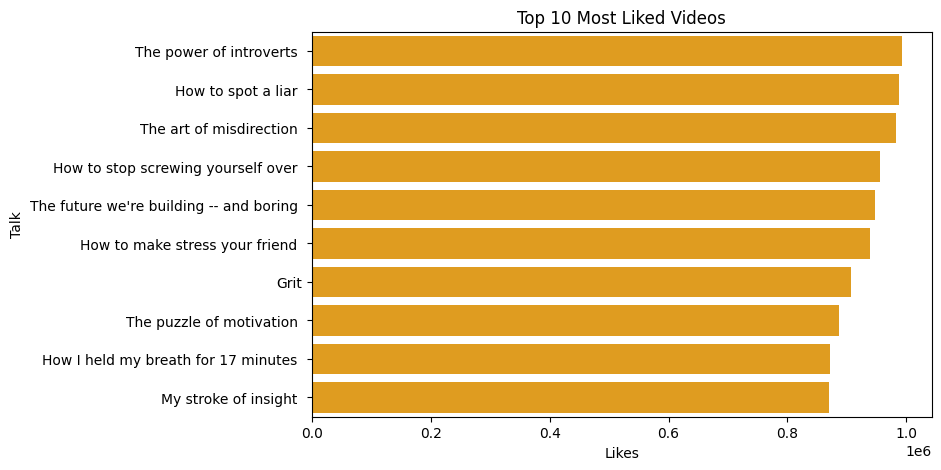

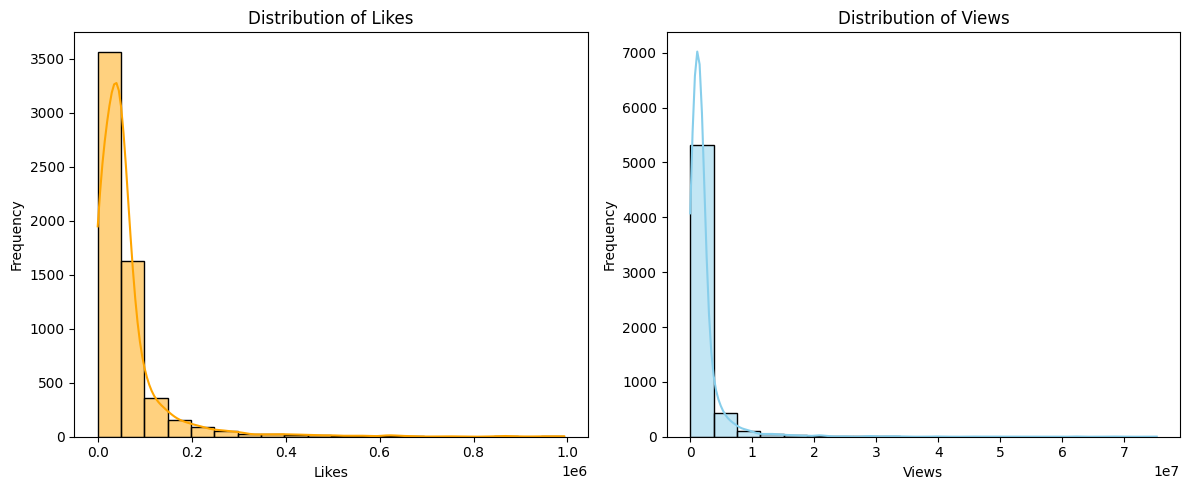

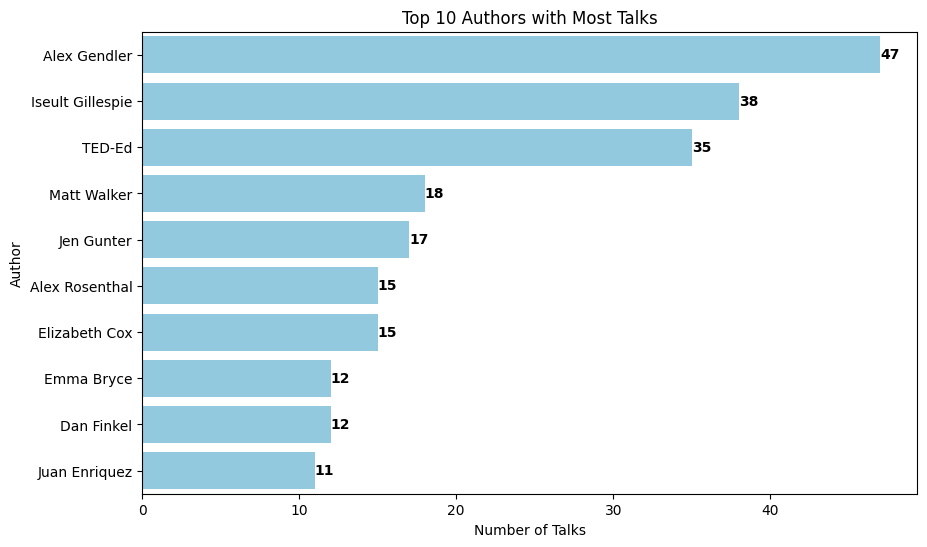

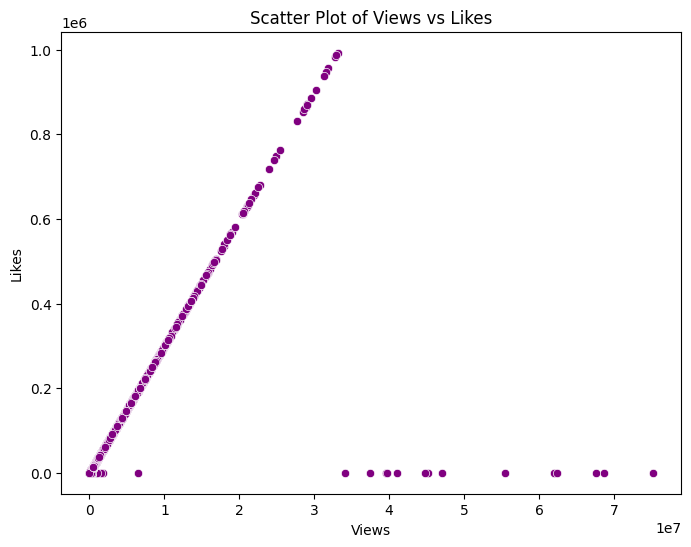

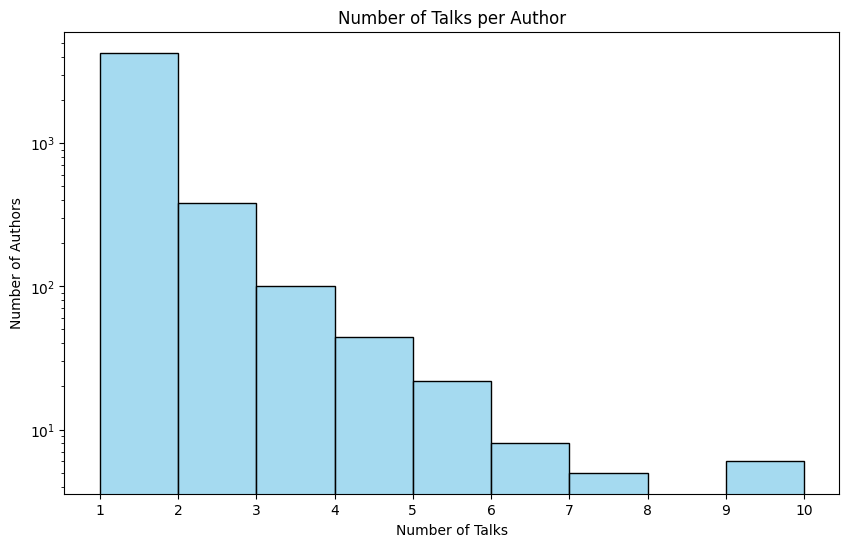

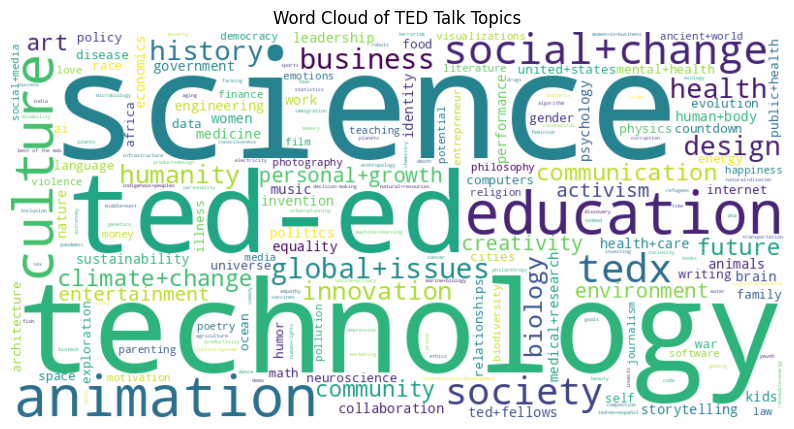

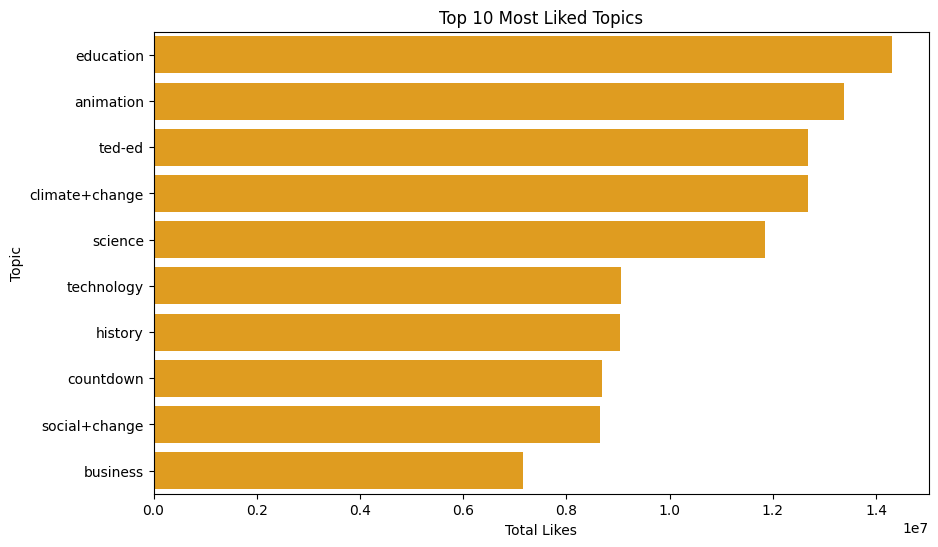

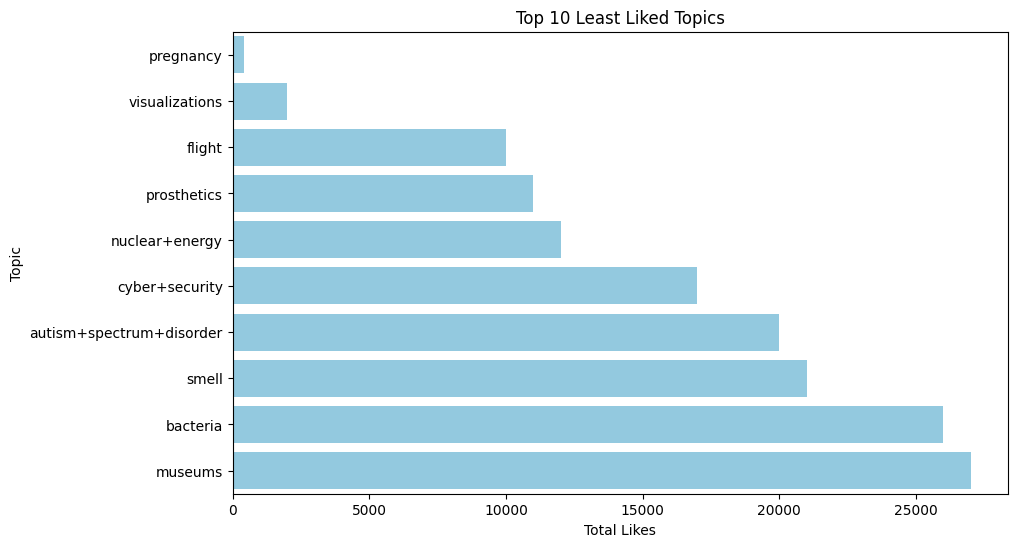

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Preparation
tedtalks['likes'] = pd.to_numeric(tedtalks['likes'].str.replace('K', '000').str.replace(',', ''), errors='coerce').fillna(0).astype(float)
tedtalks['views'] = pd.to_numeric(tedtalks['views'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

# 2. Top 10 Most Liked Videos
most_liked_videos = tedtalks.nlargest(10, 'likes')
plt.figure(figsize=(8, 5))
sns.barplot(x='likes', y='talk', data=most_liked_videos, color='orange')
plt.xlabel('Likes')
plt.ylabel('Talk')
plt.title('Top 10 Most Liked Videos')
plt.show()

# 3. Distribution of Likes and Views
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(tedtalks['likes'], bins=20, kde=True, color='orange')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')

plt.subplot(1, 2, 2)
sns.histplot(tedtalks['views'], bins=20, kde=True, color='skyblue')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Distribution of Views')
plt.tight_layout()
plt.show()

# 4. Number of Talks per Author
talks_per_author = tedtalks.groupby('author_x').size().reset_index(name='num_talks')
talks_per_author = talks_per_author.sort_values('num_talks', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='num_talks', y='author_x', data=talks_per_author, color='skyblue', label='Number of Talks')
plt.xlabel('Number of Talks')
plt.ylabel('Author')
plt.title('Top 10 Authors with Most Talks')
for index, value in enumerate(talks_per_author['num_talks']):
    plt.text(value, index, str(value), ha='left', va='center', color='black', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

# 5. Scatter plot of Views vs Likes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='views', y='likes', data=tedtalks, color='purple')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Scatter Plot of Views vs Likes')
plt.show()

# 6. Number of Talks per Author
talks_per_author = tedtalks.groupby('author_x').size().reset_index(name='num_talks')

# Plot number of talks per author and topic
plt.figure(figsize=(10, 6))
sns.histplot(talks_per_author['num_talks'], bins=range(1, 11), color='skyblue', edgecolor='black')
plt.xlabel('Number of Talks')
plt.ylabel('Number of Authors')
plt.title('Number of Talks per Author')
plt.xticks(range(1, 11))
plt.yscale('log')  # Using a logarithmic scale for the y-axis
plt.show()

# 7. Calculate the frequency of each topic
# Split the topics and create a new DataFrame with individual topics
individual_topics = tedtalks['topic'].str.split(', ').explode().reset_index(drop=True)

# Calculate the frequency of each individual topic
topic_freq = individual_topics.value_counts()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_freq)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis labels
plt.title('Word Cloud of TED Talk Topics')
plt.show()


# 8. Top 10 Most and Least Liked Topics
# Split the topics and create a new DataFrame with individual topics
individual_topics = tedtalks['topic'].str.split(', ').explode().reset_index(drop=True)

# Calculate the total likes for each individual topic
likes_per_topic = tedtalks.groupby(individual_topics)['likes'].sum().reset_index()

# Sort the topics based on total likes in descending order to get the most liked topics
most_liked_topics = likes_per_topic.sort_values('likes', ascending=False).head(10)

# Sort the topics based on total likes in ascending order to get the least liked topics
least_liked_topics = likes_per_topic.sort_values('likes').head(10)

# Plot the top 10 most liked topics
plt.figure(figsize=(10, 6))
sns.barplot(x='likes', y='topic', data=most_liked_topics, color='orange')
plt.xlabel('Total Likes')
plt.ylabel('Topic')
plt.title('Top 10 Most Liked Topics')
plt.show()

# Plot the top 10 least liked topics
plt.figure(figsize=(10, 6))
sns.barplot(x='likes', y='topic', data=least_liked_topics, color='skyblue')
plt.xlabel('Total Likes')
plt.ylabel('Topic')
plt.title('Top 10 Least Liked Topics')
plt.show()

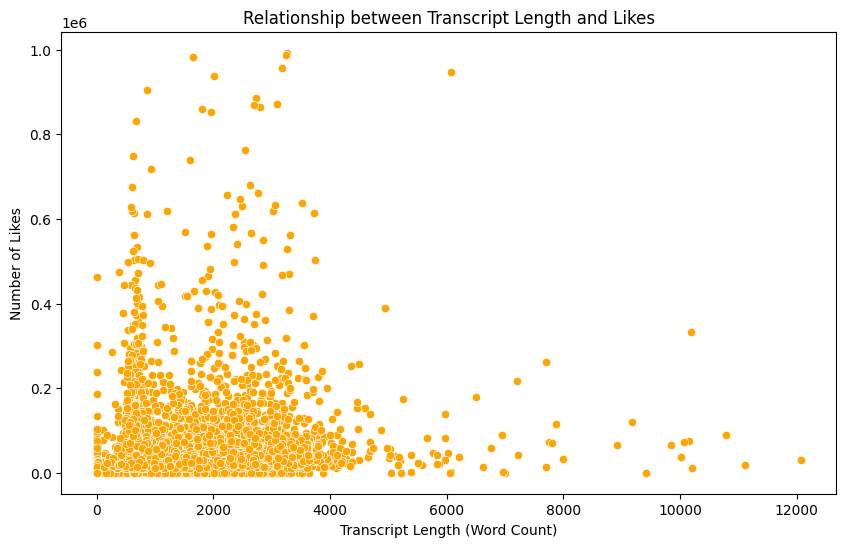

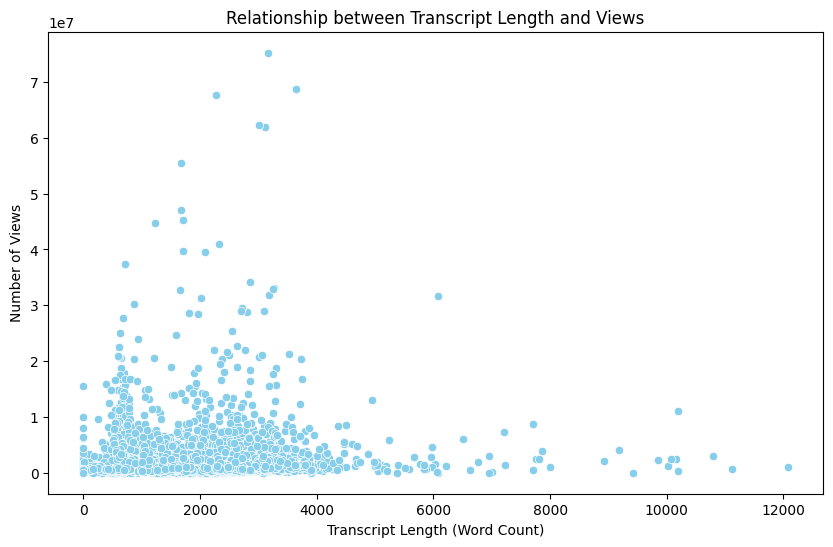

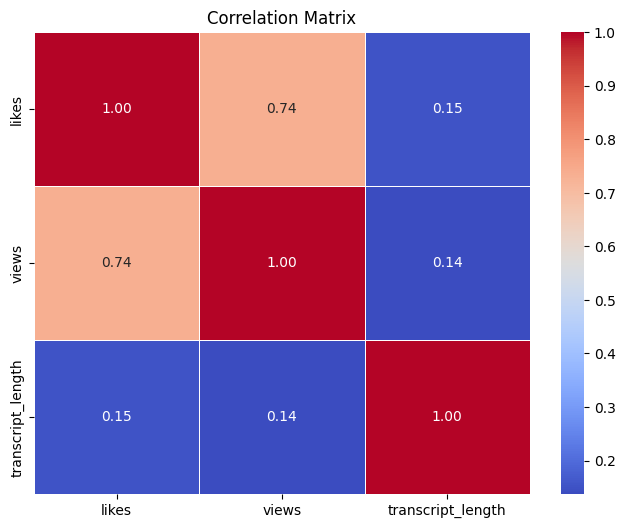

In [78]:
# Explore relationship between length of video and likes, views, authors

# # 1. Handle missing values in the 'transcript' column
tedtalks['transcript'] = tedtalks['transcript'].fillna('')

# 2. Calculate the word count for each transcript
tedtalks['transcript_length'] = tedtalks['transcript'].apply(lambda x: len(str(x).split()))

# 3. Split the topics into individual topics
individual_topics = tedtalks['topic'].str.split(', ').explode().reset_index(drop=True)

# 4. Add the individual topics back to the DataFrame
tedtalks['individual_topic'] = individual_topics

# 5. Plot the relationship between transcript length and likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='transcript_length', y='likes', data=tedtalks, color='orange')
plt.xlabel('Transcript Length (Word Count)')
plt.ylabel('Number of Likes')
plt.title('Relationship between Transcript Length and Likes')
plt.show()

# 6. Plot the relationship between transcript length and views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='transcript_length', y='views', data=tedtalks, color='skyblue')
plt.xlabel('Transcript Length (Word Count)')
plt.ylabel('Number of Views')
plt.title('Relationship between Transcript Length and Views')
plt.show()

# 7. Plot the correlation matrix between numerical features
correlations = tedtalks[['likes', 'views', 'transcript_length']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()